# This is Jeopardy!

#### Overview

This project is slightly different than others you have encountered thus far. Instead of a step-by-step tutorial, this project contains a series of open-ended requirements which describe the project you'll be building. There are many possible ways to correctly fulfill all of these requirements, and you should expect to use the internet, Codecademy, and/or other resources when you encounter a problem that you cannot easily solve.

#### Project Goals

You will work to write several functions that investigate a dataset of _Jeopardy!_ questions and answers. Filter the dataset for topics that you're interested in, compute the average difficulty of those questions, and train to become the next Jeopardy champion!

## Prerequisites

In order to complete this project, you should have completed the Pandas lessons in the <a href="https://www.codecademy.com/learn/paths/analyze-data-with-python">Analyze Data with Python Skill Path</a>. You can also find those lessons in the <a href="https://www.codecademy.com/learn/data-processing-pandas">Data Analysis with Pandas course</a> or the <a href="https://www.codecademy.com/learn/paths/data-science/">Data Scientist Career Path</a>.

Finally, the <a href="https://www.codecademy.com/learn/practical-data-cleaning">Practical Data Cleaning</a> course may also be helpful.

## Project Requirements

1. We've provided a csv file containing data about the game show _Jeopardy!_ in a file named `jeopardy.csv`. Load the data into a DataFrame and investigate its contents. Try to print out specific columns.

   Note that in order to make this project as "real-world" as possible, we haven't modified the data at all - we're giving it to you exactly how we found it. As a result, this data isn't as "clean" as the datasets you normally find on Codecademy. More specifically, there's something odd about the column names. After you figure out the problem with the column names, you may want to rename them to make your life easier for the rest of the project.
   
   In order to display the full contents of a column, we've added this line of code for you:
   
   ```py
   pd.set_option('display.max_colwidth', None)
   ```

In [82]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [83]:
jep_df = pd.read_csv('jeopardy.csv')
print(jep_df.head())
print(jep_df.columns)

# rename cols to remove leading whitespace
jep_df = jep_df.rename(columns=lambda x: x.lstrip())

print(jep_df.columns)

   Show Number    Air Date      Round                         Category  Value  \
0         4680  2004-12-31  Jeopardy!                          HISTORY   $200   
1         4680  2004-12-31  Jeopardy!  ESPN's TOP 10 ALL-TIME ATHLETES   $200   
2         4680  2004-12-31  Jeopardy!      EVERYBODY TALKS ABOUT IT...   $200   
3         4680  2004-12-31  Jeopardy!                 THE COMPANY LINE   $200   
4         4680  2004-12-31  Jeopardy!              EPITAPHS & TRIBUTES   $200   

                                                                                                      Question  \
0             For the last 8 years of his life, Galileo was under house arrest for espousing this man's theory   
1  No. 2: 1912 Olympian; football star at Carlisle Indian School; 6 MLB seasons with the Reds, Giants & Braves   
2                     The city of Yuma in this state has a record average of 4,055 hours of sunshine each year   
3                         In 1963, live on "The Art Linkl

2. Write a function that filters the dataset for questions that contains all of the words in a list of words. For example, when the list `["King", "England"]` was passed to our function, the function returned a DataFrame of 49 rows. Every row had the strings `"King"` and `"England"` somewhere in its `" Question"`.

   Test your function by printing out the column containing the question of each row of the dataset.

In [84]:
words_list = ["King", "England"]

def check_words(data, words_list, column_name="Question"):
  matched_vals = pd.Series()
  for item in data[column_name]:
    if all(word in item for word in words_list):
      matched_vals = matched_vals.append(pd.Series(item), ignore_index=True)
  return matched_vals

def check_words_count(data, words_list, column_name="Question"):
  count = 0
  for item in data[column_name]:
    if all(word in item for word in words_list):
      count += 1
  return count

# another way of doing this, using a lamda filter...
def filter_data(data, words, column_name="Question"):
  filter = lambda x: all(word in x for word in words)
  return data.loc[data[column_name].apply(filter)]

# Testing the filter function
filtered = filter_data(jep_df, words_list, "Question")
print(filtered['Question'])

# count the number of questions that contain all of the words in words_list
print(filtered['Question'].count())

print(type(filtered['Question']))

4953                                                                                                                                                                                                                                                                      Both England's King George V & FDR put their stamp of approval on this "King of Hobbies"
14912                                                                                                                                                                                                                                                            This country's King Louis IV was nicknamed "Louis From Overseas" because he was raised in England
21511                                                                                                                                                                                                                                                                                 this man and

In [85]:
# test the check_words function
print(check_words(jep_df, words_list))
print(check_words_count(jep_df, words_list))

0                                                                                                                                                                                                                                                                     Both England's King George V & FDR put their stamp of approval on this "King of Hobbies"
1                                                                                                                                                                                                                                                            This country's King Louis IV was nicknamed "Louis From Overseas" because he was raised in England
2                                                                                                                                                                                                                                                                                 this man and his son rul

/var/folders/g_/m6dzl4b14ql3dvh64l3cq08w0000gn/T/ipykernel_62808/72793422.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  matched_vals = pd.Series()
/var/folders/g_/m6dzl4b14ql3dvh64l3cq08w0000gn/T/ipykernel_62808/72793422.py:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matched_vals = matched_vals.append(pd.Series(item), ignore_index=True)


3. Test your original function with a few different sets of words to try to find some ways your function breaks. Edit your function so it is more robust.

   For example, think about capitalization. We probably want to find questions that contain the word `"King"` or `"king"`.
   
   You may also want to check to make sure you don't find rows that contain substrings of your given words. For example, our function found a question that didn't contain the word `"king"`, however it did contain the word `"viking"` &mdash; it found the `"king"` inside `"viking"`. Note that this also comes with some drawbacks &mdash; you would no longer find questions that contained words like `"England's"`.

In [86]:
print(check_words(jep_df, ["king", "england"]))
print(check_words_count(jep_df, ["king", "england"]))

/var/folders/g_/m6dzl4b14ql3dvh64l3cq08w0000gn/T/ipykernel_62808/72793422.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  matched_vals = pd.Series()


Series([], dtype: float64)
0


In [87]:
filtered_test = filter_data(jep_df, ["king", "england"], "Question")
print(filtered_test['Question'])

# count the number of questions that contain all of the words in words_list
print(filtered_test['Question'].count())

Series([], Name: Question, dtype: object)
0


4. We may want to eventually compute aggregate statistics, like `.mean()` on the `" Value"` column. But right now, the values in that column are strings. Convert the`" Value"` column to floats. If you'd like to, you can create a new column with float values.

   Now that you can filter the dataset of question, use your new column that contains the float values of each question to find the "difficulty" of certain topics. For example, what is the average value of questions that contain the word `"King"`?
   
   Make sure to use the dataset that contains the float values as the dataset you use in your filtering function.

In [88]:
# try:
#     jep_df['Value'] = jep_df['Value'].str.strip('$')
#     jep_df['Value'] = jep_df['Value'].str.replace(',', '')
#     jep_df['Value'] = jep_df['Value'].astype(float)
# except:
#     pass

jep_df["Value"] = jep_df["Value"].apply(lambda x: float(x[1:].replace(',','')) if x != "None" else 0)

print(jep_df['Value'].head())

# calculate the mean of the Value column
print(jep_df['Value'].mean())

0    200.0
1    200.0
2    200.0
3    200.0
4    200.0
Name: Value, dtype: float64
739.9884755451067


5. Write a function that returns the count of unique answers to all of the questions in a dataset. For example, after filtering the entire dataset to only questions containing the word `"King"`, we could then find all of the unique answers to those questions. The answer "Henry VIII" appeared 55 times and was the most common answer.

In [100]:
# print(filtered.head())
print("number of unique answers in filtered: ", filtered['Answer'].nunique())

def get_answer_counts(data):
    return data["Answer"].value_counts()

# Testing the answer count function
print(get_answer_counts(filtered))

number of unique answers in filtered:  41
Magna Carta                     2
King Edward VIII                2
Oliver Cromwell                 2
1066                            2
Louis XIV                       2
William the Conqueror           2
Nassau                          2
IV                              2
the Black Prince                1
Denmark                         1
Georgia                         1
"Longshanks"                    1
Anthony van Dyck                1
Philately (stamp collecting)    1
King Philip                     1
William of Orange               1
the Stone of Scone              1
William                         1
Richard the Lionheart           1
Edward VII                      1
John Henry                      1
Graham Chapman                  1
1509                            1
"the Merry Monarch"             1
Canute                          1
George Frideric Handel          1
Marie de Medici                 1
the Archbishop of Canterbury    1
Cather

6. Explore from here! This is an incredibly rich dataset, and there are so many interesting things to discover. There are a few columns that we haven't even started looking at yet. Here are some ideas on ways to continue working with this data:

 * Investigate the ways in which questions change over time by filtering by the date. How many questions from the 90s use the word `"Computer"` compared to questions from the 2000s?
 * Is there a connection between the round and the category? Are you more likely to find certain categories, like `"Literature"` in Single Jeopardy or Double Jeopardy?
 * Build a system to quiz yourself. Grab random questions, and use the <a href="https://docs.python.org/3/library/functions.html#input">input</a> function to get a response from the user. Check to see if that response was right or wrong.

Number of times Computer appears between 1990-01-01 00:00:00 and 1999-12-31 00:00:00: 8
Number of times Computer appears between 1990-01-01 00:00:00 and 1999-12-31 00:00:00: 25


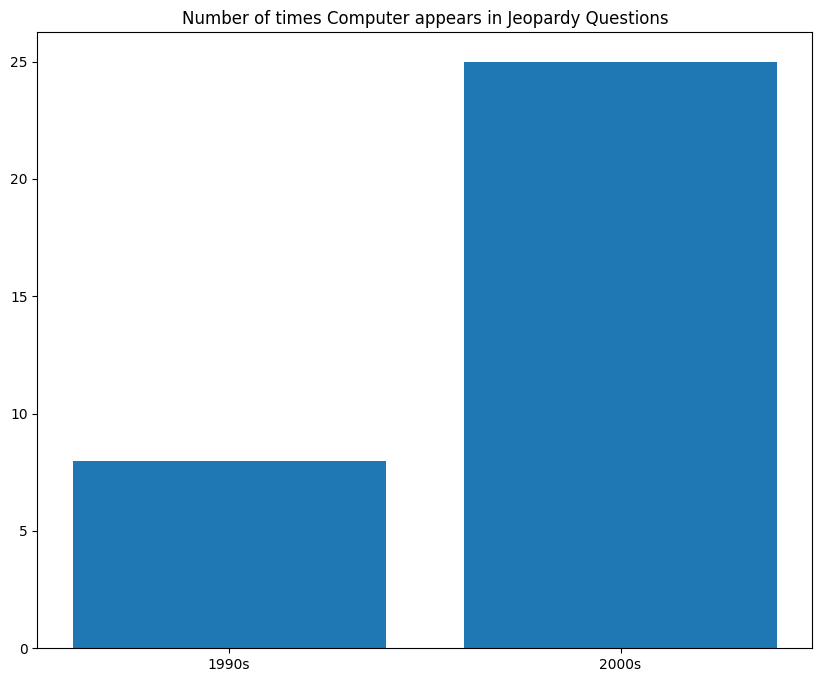

In [109]:
from datetime import datetime
import matplotlib.pyplot as plt

keyword = "Computer"
start = datetime(1990, 1, 1)
end = datetime(1999, 12, 31)

# count number of times keyword appears in the Question column during the 90s
def count_keyword(data, keyword, start, end):
  count = 0
  # convert Air Date column to datetime
  data['Air Date'] = pd.to_datetime(data['Air Date'])
  for index, row in data.iterrows():
      if keyword in row['Question'] and start <= row['Air Date'] <= end:
          count += 1
  return count

print("Number of times {} appears between {} and {}: {}".format(keyword, start, end, count_keyword(jep_df, keyword, start, end)))
print("Number of times {} appears between {} and {}: {}".format(keyword, start, end, count_keyword(jep_df, keyword, datetime(2000,1,1), datetime(2009, 12, 31))))

# create a barchart to compare the number of times a keyword appears in the Question column during the 90s and 2000s
plt.figure(figsize=(10, 8))
plt.bar(['1990s', '2000s'], [count_keyword(jep_df, keyword, datetime(1990,1,1), datetime(1999, 12, 31)), count_keyword(jep_df, keyword, datetime(2000,1,1), datetime(2009, 12, 31))])
plt.title("Number of times {} appears in Jeopardy Questions".format(keyword))
plt.show()


## Solution

7. Compare your program to our <a href="https://content.codecademy.com/PRO/independent-practice-projects/jeopardy/jeopardy_solution.zip">sample solution code</a> - remember, that your program might look different from ours (and probably will) and that's okay!

8. Great work! Visit <a href="https://discuss.codecademy.com/t/this-is-jeopardy-challenge-project-python-pandas/462365">our forums</a> to compare your project to our sample solution code. You can also learn how to host your own solution on GitHub so you can share it with other learners! Your solution might look different from ours, and that's okay! There are multiple ways to solve these projects, and you'll learn more by seeing others' code.